In [99]:
import tensorflow as tf
import numpy as np

In [100]:
np.random.seed(101)
tf.set_random_seed(101)

In [101]:

# Let's create some random variables
rand_a = np.random.uniform(0,100,(5,5))
rand_b = np.random.uniform(0,100,(5,1))

In [102]:
# Let's create some PlaceHolders
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [103]:
# Let's create some operations
add_op = a+b
mul_op = a*b

In [104]:
# Let's create some session to execute these operations into the session

In [105]:

with tf.Session() as sess:
   add_results = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
   print(add_results) 

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


In [106]:
with tf.Session() as sess:
    result = sess.run(mul_op, feed_dict={a:rand_a, b:rand_b})
    print (result)

[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


In [107]:
# Neural Network

In [108]:
n_features = 10
n_dense_neurons = 3

In [109]:
x = tf.placeholder(tf.float32, (None, n_features))

In [110]:
w = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
b = tf.Variable(tf.random_normal([n_dense_neurons]))

In [111]:
xw = tf.matmul(x,w)

In [112]:
z = tf.add(xw,b)

In [113]:
a = tf.sigmoid(z)

In [114]:
init = tf.global_variables_initializer()

In [115]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x:np.random.random([1, n_features])})

In [116]:

print(layer_out)

[[ 0.42722774  0.32188249  0.37055063]]


# Now let's adjust our variables i.e. W and b.

In [117]:
# Lets add some data along with some noise

In [118]:
x_data = np.linspace(0,10,20) + np.random.uniform(-1.5,1.5,20)

In [119]:
print(x_data)

[-1.20856056 -0.66514173  1.65715347  2.75038698  1.08394406  1.95829658
  3.67536933  2.6771199   4.81463973  4.69974777  5.8051912   5.85411826
  4.94597956  6.01391507  7.59403631  6.75603782  8.42140277  7.86139713
  8.13210941  9.03483077]


In [120]:
y_label = np.linspace(0,10,20) + np.random.uniform(-1.5,1.5, 20)

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline

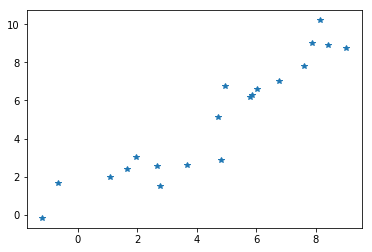

In [122]:
plt.plot(x_data,y_label, '*') #'*' to visualize only the points

In [123]:
#y = mx+b
np.random.rand(2)

array([ 0.78452185,  0.68724204])

In [124]:


#assigning the random weights to the variable
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [125]:
#
error =0
for x,y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

# optimizer to lower the error

In [126]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [127]:
#initialize the variable before using it in session
init = tf.global_variables_initializer()

In [128]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 1000
    for i in range(training_steps):
        sess.run(train)
    final_slope, final_intercept = sess.run([m,b])

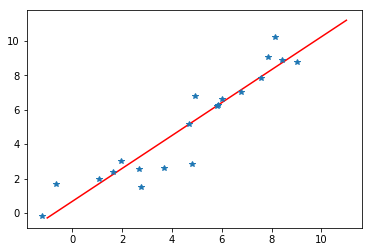

In [129]:
x_test = np.linspace(-1,11,100)
#y = mx+b
y_pred_plot = final_slope*x_test+final_intercept
plt.plot(x_test,y_pred_plot, 'r')
plt.plot(x_data,y_label,'*')

In [130]:

''' Let's use the estimator API'''
feat_col = [tf.feature_column.numeric_column('x', shape = [1])]


In [131]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_col)



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/y_/n4k0djsx7kg6tt7q600grqf80000gn/T/tmpxxbo2tjt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x183f4a0278>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_label,
                                                    test_size =0.2)


In [133]:
print(x_train.shape)


(16,)


In [134]:
print(x_test.shape)

(4,)


In [135]:

''' We need an input function which can act like a dict which can take feed fucntion and batch size at once'''
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train,
                                          batch_size=8,
                                          num_epochs=None, shuffle=True)

In [136]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train,
                                          batch_size=8,
                                          num_epochs=None, shuffle=False)
#shuffle false because we will use this train_input_function for evaluation against the test evaluation function 

In [137]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_test}, y_test,
                                          batch_size=8,
                                          num_epochs=None, shuffle=False)

In [138]:
# Let's train the estimator

In [139]:
estimator.train(input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/y_/n4k0djsx7kg6tt7q600grqf80000gn/T/tmpxxbo2tjt/model.ckpt.
INFO:tensorflow:loss = 188.815, step = 1
INFO:tensorflow:global_step/sec: 663.949
INFO:tensorflow:loss = 8.80559, step = 101 (0.152 sec)
INFO:tensorflow:global_step/sec: 862.582
INFO:tensorflow:loss = 12.4993, step = 201 (0.116 sec)
INFO:tensorflow:global_step/sec: 854.789
INFO:tensorflow:loss = 7.19622, step = 301 (0.117 sec)
INFO:tensorflow:global_step/sec: 849.127
INFO:tensorflow:loss = 6.81404, step = 401 (0.118 sec)
INFO:tensorflow:global_step/sec: 856.65
INFO:tensorflow:loss = 9.87138, step = 501 (0.117 sec)
INFO:tensorflow:global_step/sec: 876.384
INFO:tensorflow:loss = 11.3777, step = 601 (0.114 sec)
INFO:tensorflow:global_step/sec: 896.267
INFO:tensorflow:loss = 11.9495, step = 701 (0.112 sec)
INFO:tensorflow:global_step/sec: 887.398
INFO:tensorflow:loss = 0.794987, step = 801 (0.113 sec)
INFO:tensorflow:global_step/

In [140]:
# Evaluation matrics 

In [141]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=2000)

INFO:tensorflow:Starting evaluation at 2018-02-26-00:53:45
INFO:tensorflow:Restoring parameters from /var/folders/y_/n4k0djsx7kg6tt7q600grqf80000gn/T/tmpxxbo2tjt/model.ckpt-1000
INFO:tensorflow:Evaluation [1/2000]
INFO:tensorflow:Evaluation [2/2000]
INFO:tensorflow:Evaluation [3/2000]
INFO:tensorflow:Evaluation [4/2000]
INFO:tensorflow:Evaluation [5/2000]
INFO:tensorflow:Evaluation [6/2000]
INFO:tensorflow:Evaluation [7/2000]
INFO:tensorflow:Evaluation [8/2000]
INFO:tensorflow:Evaluation [9/2000]
INFO:tensorflow:Evaluation [10/2000]
INFO:tensorflow:Evaluation [11/2000]
INFO:tensorflow:Evaluation [12/2000]
INFO:tensorflow:Evaluation [13/2000]
INFO:tensorflow:Evaluation [14/2000]
INFO:tensorflow:Evaluation [15/2000]
INFO:tensorflow:Evaluation [16/2000]
INFO:tensorflow:Evaluation [17/2000]
INFO:tensorflow:Evaluation [18/2000]
INFO:tensorflow:Evaluation [19/2000]
INFO:tensorflow:Evaluation [20/2000]
INFO:tensorflow:Evaluation [21/2000]
INFO:tensorflow:Evaluation [22/2000]
INFO:tensorflow:E

INFO:tensorflow:Evaluation [215/2000]
INFO:tensorflow:Evaluation [216/2000]
INFO:tensorflow:Evaluation [217/2000]
INFO:tensorflow:Evaluation [218/2000]
INFO:tensorflow:Evaluation [219/2000]
INFO:tensorflow:Evaluation [220/2000]
INFO:tensorflow:Evaluation [221/2000]
INFO:tensorflow:Evaluation [222/2000]
INFO:tensorflow:Evaluation [223/2000]
INFO:tensorflow:Evaluation [224/2000]
INFO:tensorflow:Evaluation [225/2000]
INFO:tensorflow:Evaluation [226/2000]
INFO:tensorflow:Evaluation [227/2000]
INFO:tensorflow:Evaluation [228/2000]
INFO:tensorflow:Evaluation [229/2000]
INFO:tensorflow:Evaluation [230/2000]
INFO:tensorflow:Evaluation [231/2000]
INFO:tensorflow:Evaluation [232/2000]
INFO:tensorflow:Evaluation [233/2000]
INFO:tensorflow:Evaluation [234/2000]
INFO:tensorflow:Evaluation [235/2000]
INFO:tensorflow:Evaluation [236/2000]
INFO:tensorflow:Evaluation [237/2000]
INFO:tensorflow:Evaluation [238/2000]
INFO:tensorflow:Evaluation [239/2000]
INFO:tensorflow:Evaluation [240/2000]
INFO:tensorf

INFO:tensorflow:Evaluation [431/2000]
INFO:tensorflow:Evaluation [432/2000]
INFO:tensorflow:Evaluation [433/2000]
INFO:tensorflow:Evaluation [434/2000]
INFO:tensorflow:Evaluation [435/2000]
INFO:tensorflow:Evaluation [436/2000]
INFO:tensorflow:Evaluation [437/2000]
INFO:tensorflow:Evaluation [438/2000]
INFO:tensorflow:Evaluation [439/2000]
INFO:tensorflow:Evaluation [440/2000]
INFO:tensorflow:Evaluation [441/2000]
INFO:tensorflow:Evaluation [442/2000]
INFO:tensorflow:Evaluation [443/2000]
INFO:tensorflow:Evaluation [444/2000]
INFO:tensorflow:Evaluation [445/2000]
INFO:tensorflow:Evaluation [446/2000]
INFO:tensorflow:Evaluation [447/2000]
INFO:tensorflow:Evaluation [448/2000]
INFO:tensorflow:Evaluation [449/2000]
INFO:tensorflow:Evaluation [450/2000]
INFO:tensorflow:Evaluation [451/2000]
INFO:tensorflow:Evaluation [452/2000]
INFO:tensorflow:Evaluation [453/2000]
INFO:tensorflow:Evaluation [454/2000]
INFO:tensorflow:Evaluation [455/2000]
INFO:tensorflow:Evaluation [456/2000]
INFO:tensorf

INFO:tensorflow:Evaluation [646/2000]
INFO:tensorflow:Evaluation [647/2000]
INFO:tensorflow:Evaluation [648/2000]
INFO:tensorflow:Evaluation [649/2000]
INFO:tensorflow:Evaluation [650/2000]
INFO:tensorflow:Evaluation [651/2000]
INFO:tensorflow:Evaluation [652/2000]
INFO:tensorflow:Evaluation [653/2000]
INFO:tensorflow:Evaluation [654/2000]
INFO:tensorflow:Evaluation [655/2000]
INFO:tensorflow:Evaluation [656/2000]
INFO:tensorflow:Evaluation [657/2000]
INFO:tensorflow:Evaluation [658/2000]
INFO:tensorflow:Evaluation [659/2000]
INFO:tensorflow:Evaluation [660/2000]
INFO:tensorflow:Evaluation [661/2000]
INFO:tensorflow:Evaluation [662/2000]
INFO:tensorflow:Evaluation [663/2000]
INFO:tensorflow:Evaluation [664/2000]
INFO:tensorflow:Evaluation [665/2000]
INFO:tensorflow:Evaluation [666/2000]
INFO:tensorflow:Evaluation [667/2000]
INFO:tensorflow:Evaluation [668/2000]
INFO:tensorflow:Evaluation [669/2000]
INFO:tensorflow:Evaluation [670/2000]
INFO:tensorflow:Evaluation [671/2000]
INFO:tensorf

INFO:tensorflow:Evaluation [862/2000]
INFO:tensorflow:Evaluation [863/2000]
INFO:tensorflow:Evaluation [864/2000]
INFO:tensorflow:Evaluation [865/2000]
INFO:tensorflow:Evaluation [866/2000]
INFO:tensorflow:Evaluation [867/2000]
INFO:tensorflow:Evaluation [868/2000]
INFO:tensorflow:Evaluation [869/2000]
INFO:tensorflow:Evaluation [870/2000]
INFO:tensorflow:Evaluation [871/2000]
INFO:tensorflow:Evaluation [872/2000]
INFO:tensorflow:Evaluation [873/2000]
INFO:tensorflow:Evaluation [874/2000]
INFO:tensorflow:Evaluation [875/2000]
INFO:tensorflow:Evaluation [876/2000]
INFO:tensorflow:Evaluation [877/2000]
INFO:tensorflow:Evaluation [878/2000]
INFO:tensorflow:Evaluation [879/2000]
INFO:tensorflow:Evaluation [880/2000]
INFO:tensorflow:Evaluation [881/2000]
INFO:tensorflow:Evaluation [882/2000]
INFO:tensorflow:Evaluation [883/2000]
INFO:tensorflow:Evaluation [884/2000]
INFO:tensorflow:Evaluation [885/2000]
INFO:tensorflow:Evaluation [886/2000]
INFO:tensorflow:Evaluation [887/2000]
INFO:tensorf

INFO:tensorflow:Evaluation [1076/2000]
INFO:tensorflow:Evaluation [1077/2000]
INFO:tensorflow:Evaluation [1078/2000]
INFO:tensorflow:Evaluation [1079/2000]
INFO:tensorflow:Evaluation [1080/2000]
INFO:tensorflow:Evaluation [1081/2000]
INFO:tensorflow:Evaluation [1082/2000]
INFO:tensorflow:Evaluation [1083/2000]
INFO:tensorflow:Evaluation [1084/2000]
INFO:tensorflow:Evaluation [1085/2000]
INFO:tensorflow:Evaluation [1086/2000]
INFO:tensorflow:Evaluation [1087/2000]
INFO:tensorflow:Evaluation [1088/2000]
INFO:tensorflow:Evaluation [1089/2000]
INFO:tensorflow:Evaluation [1090/2000]
INFO:tensorflow:Evaluation [1091/2000]
INFO:tensorflow:Evaluation [1092/2000]
INFO:tensorflow:Evaluation [1093/2000]
INFO:tensorflow:Evaluation [1094/2000]
INFO:tensorflow:Evaluation [1095/2000]
INFO:tensorflow:Evaluation [1096/2000]
INFO:tensorflow:Evaluation [1097/2000]
INFO:tensorflow:Evaluation [1098/2000]
INFO:tensorflow:Evaluation [1099/2000]
INFO:tensorflow:Evaluation [1100/2000]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1287/2000]
INFO:tensorflow:Evaluation [1288/2000]
INFO:tensorflow:Evaluation [1289/2000]
INFO:tensorflow:Evaluation [1290/2000]
INFO:tensorflow:Evaluation [1291/2000]
INFO:tensorflow:Evaluation [1292/2000]
INFO:tensorflow:Evaluation [1293/2000]
INFO:tensorflow:Evaluation [1294/2000]
INFO:tensorflow:Evaluation [1295/2000]
INFO:tensorflow:Evaluation [1296/2000]
INFO:tensorflow:Evaluation [1297/2000]
INFO:tensorflow:Evaluation [1298/2000]
INFO:tensorflow:Evaluation [1299/2000]
INFO:tensorflow:Evaluation [1300/2000]
INFO:tensorflow:Evaluation [1301/2000]
INFO:tensorflow:Evaluation [1302/2000]
INFO:tensorflow:Evaluation [1303/2000]
INFO:tensorflow:Evaluation [1304/2000]
INFO:tensorflow:Evaluation [1305/2000]
INFO:tensorflow:Evaluation [1306/2000]
INFO:tensorflow:Evaluation [1307/2000]
INFO:tensorflow:Evaluation [1308/2000]
INFO:tensorflow:Evaluation [1309/2000]
INFO:tensorflow:Evaluation [1310/2000]
INFO:tensorflow:Evaluation [1311/2000]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1498/2000]
INFO:tensorflow:Evaluation [1499/2000]
INFO:tensorflow:Evaluation [1500/2000]
INFO:tensorflow:Evaluation [1501/2000]
INFO:tensorflow:Evaluation [1502/2000]
INFO:tensorflow:Evaluation [1503/2000]
INFO:tensorflow:Evaluation [1504/2000]
INFO:tensorflow:Evaluation [1505/2000]
INFO:tensorflow:Evaluation [1506/2000]
INFO:tensorflow:Evaluation [1507/2000]
INFO:tensorflow:Evaluation [1508/2000]
INFO:tensorflow:Evaluation [1509/2000]
INFO:tensorflow:Evaluation [1510/2000]
INFO:tensorflow:Evaluation [1511/2000]
INFO:tensorflow:Evaluation [1512/2000]
INFO:tensorflow:Evaluation [1513/2000]
INFO:tensorflow:Evaluation [1514/2000]
INFO:tensorflow:Evaluation [1515/2000]
INFO:tensorflow:Evaluation [1516/2000]
INFO:tensorflow:Evaluation [1517/2000]
INFO:tensorflow:Evaluation [1518/2000]
INFO:tensorflow:Evaluation [1519/2000]
INFO:tensorflow:Evaluation [1520/2000]
INFO:tensorflow:Evaluation [1521/2000]
INFO:tensorflow:Evaluation [1522/2000]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1709/2000]
INFO:tensorflow:Evaluation [1710/2000]
INFO:tensorflow:Evaluation [1711/2000]
INFO:tensorflow:Evaluation [1712/2000]
INFO:tensorflow:Evaluation [1713/2000]
INFO:tensorflow:Evaluation [1714/2000]
INFO:tensorflow:Evaluation [1715/2000]
INFO:tensorflow:Evaluation [1716/2000]
INFO:tensorflow:Evaluation [1717/2000]
INFO:tensorflow:Evaluation [1718/2000]
INFO:tensorflow:Evaluation [1719/2000]
INFO:tensorflow:Evaluation [1720/2000]
INFO:tensorflow:Evaluation [1721/2000]
INFO:tensorflow:Evaluation [1722/2000]
INFO:tensorflow:Evaluation [1723/2000]
INFO:tensorflow:Evaluation [1724/2000]
INFO:tensorflow:Evaluation [1725/2000]
INFO:tensorflow:Evaluation [1726/2000]
INFO:tensorflow:Evaluation [1727/2000]
INFO:tensorflow:Evaluation [1728/2000]
INFO:tensorflow:Evaluation [1729/2000]
INFO:tensorflow:Evaluation [1730/2000]
INFO:tensorflow:Evaluation [1731/2000]
INFO:tensorflow:Evaluation [1732/2000]
INFO:tensorflow:Evaluation [1733/2000]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1920/2000]
INFO:tensorflow:Evaluation [1921/2000]
INFO:tensorflow:Evaluation [1922/2000]
INFO:tensorflow:Evaluation [1923/2000]
INFO:tensorflow:Evaluation [1924/2000]
INFO:tensorflow:Evaluation [1925/2000]
INFO:tensorflow:Evaluation [1926/2000]
INFO:tensorflow:Evaluation [1927/2000]
INFO:tensorflow:Evaluation [1928/2000]
INFO:tensorflow:Evaluation [1929/2000]
INFO:tensorflow:Evaluation [1930/2000]
INFO:tensorflow:Evaluation [1931/2000]
INFO:tensorflow:Evaluation [1932/2000]
INFO:tensorflow:Evaluation [1933/2000]
INFO:tensorflow:Evaluation [1934/2000]
INFO:tensorflow:Evaluation [1935/2000]
INFO:tensorflow:Evaluation [1936/2000]
INFO:tensorflow:Evaluation [1937/2000]
INFO:tensorflow:Evaluation [1938/2000]
INFO:tensorflow:Evaluation [1939/2000]
INFO:tensorflow:Evaluation [1940/2000]
INFO:tensorflow:Evaluation [1941/2000]
INFO:tensorflow:Evaluation [1942/2000]
INFO:tensorflow:Evaluation [1943/2000]
INFO:tensorflow:Evaluation [1944/2000]
INFO:tensorflow:Evaluatio

In [142]:
test_matrics=estimator.evaluate(input_fn=test_input_func, steps=2000)

INFO:tensorflow:Starting evaluation at 2018-02-26-00:53:58
INFO:tensorflow:Restoring parameters from /var/folders/y_/n4k0djsx7kg6tt7q600grqf80000gn/T/tmpxxbo2tjt/model.ckpt-1000
INFO:tensorflow:Evaluation [1/2000]
INFO:tensorflow:Evaluation [2/2000]
INFO:tensorflow:Evaluation [3/2000]
INFO:tensorflow:Evaluation [4/2000]
INFO:tensorflow:Evaluation [5/2000]
INFO:tensorflow:Evaluation [6/2000]
INFO:tensorflow:Evaluation [7/2000]
INFO:tensorflow:Evaluation [8/2000]
INFO:tensorflow:Evaluation [9/2000]
INFO:tensorflow:Evaluation [10/2000]
INFO:tensorflow:Evaluation [11/2000]
INFO:tensorflow:Evaluation [12/2000]
INFO:tensorflow:Evaluation [13/2000]
INFO:tensorflow:Evaluation [14/2000]
INFO:tensorflow:Evaluation [15/2000]
INFO:tensorflow:Evaluation [16/2000]
INFO:tensorflow:Evaluation [17/2000]
INFO:tensorflow:Evaluation [18/2000]
INFO:tensorflow:Evaluation [19/2000]
INFO:tensorflow:Evaluation [20/2000]
INFO:tensorflow:Evaluation [21/2000]
INFO:tensorflow:Evaluation [22/2000]
INFO:tensorflow:E

INFO:tensorflow:Evaluation [215/2000]
INFO:tensorflow:Evaluation [216/2000]
INFO:tensorflow:Evaluation [217/2000]
INFO:tensorflow:Evaluation [218/2000]
INFO:tensorflow:Evaluation [219/2000]
INFO:tensorflow:Evaluation [220/2000]
INFO:tensorflow:Evaluation [221/2000]
INFO:tensorflow:Evaluation [222/2000]
INFO:tensorflow:Evaluation [223/2000]
INFO:tensorflow:Evaluation [224/2000]
INFO:tensorflow:Evaluation [225/2000]
INFO:tensorflow:Evaluation [226/2000]
INFO:tensorflow:Evaluation [227/2000]
INFO:tensorflow:Evaluation [228/2000]
INFO:tensorflow:Evaluation [229/2000]
INFO:tensorflow:Evaluation [230/2000]
INFO:tensorflow:Evaluation [231/2000]
INFO:tensorflow:Evaluation [232/2000]
INFO:tensorflow:Evaluation [233/2000]
INFO:tensorflow:Evaluation [234/2000]
INFO:tensorflow:Evaluation [235/2000]
INFO:tensorflow:Evaluation [236/2000]
INFO:tensorflow:Evaluation [237/2000]
INFO:tensorflow:Evaluation [238/2000]
INFO:tensorflow:Evaluation [239/2000]
INFO:tensorflow:Evaluation [240/2000]
INFO:tensorf

INFO:tensorflow:Evaluation [431/2000]
INFO:tensorflow:Evaluation [432/2000]
INFO:tensorflow:Evaluation [433/2000]
INFO:tensorflow:Evaluation [434/2000]
INFO:tensorflow:Evaluation [435/2000]
INFO:tensorflow:Evaluation [436/2000]
INFO:tensorflow:Evaluation [437/2000]
INFO:tensorflow:Evaluation [438/2000]
INFO:tensorflow:Evaluation [439/2000]
INFO:tensorflow:Evaluation [440/2000]
INFO:tensorflow:Evaluation [441/2000]
INFO:tensorflow:Evaluation [442/2000]
INFO:tensorflow:Evaluation [443/2000]
INFO:tensorflow:Evaluation [444/2000]
INFO:tensorflow:Evaluation [445/2000]
INFO:tensorflow:Evaluation [446/2000]
INFO:tensorflow:Evaluation [447/2000]
INFO:tensorflow:Evaluation [448/2000]
INFO:tensorflow:Evaluation [449/2000]
INFO:tensorflow:Evaluation [450/2000]
INFO:tensorflow:Evaluation [451/2000]
INFO:tensorflow:Evaluation [452/2000]
INFO:tensorflow:Evaluation [453/2000]
INFO:tensorflow:Evaluation [454/2000]
INFO:tensorflow:Evaluation [455/2000]
INFO:tensorflow:Evaluation [456/2000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/2000]
INFO:tensorflow:Evaluation [648/2000]
INFO:tensorflow:Evaluation [649/2000]
INFO:tensorflow:Evaluation [650/2000]
INFO:tensorflow:Evaluation [651/2000]
INFO:tensorflow:Evaluation [652/2000]
INFO:tensorflow:Evaluation [653/2000]
INFO:tensorflow:Evaluation [654/2000]
INFO:tensorflow:Evaluation [655/2000]
INFO:tensorflow:Evaluation [656/2000]
INFO:tensorflow:Evaluation [657/2000]
INFO:tensorflow:Evaluation [658/2000]
INFO:tensorflow:Evaluation [659/2000]
INFO:tensorflow:Evaluation [660/2000]
INFO:tensorflow:Evaluation [661/2000]
INFO:tensorflow:Evaluation [662/2000]
INFO:tensorflow:Evaluation [663/2000]
INFO:tensorflow:Evaluation [664/2000]
INFO:tensorflow:Evaluation [665/2000]
INFO:tensorflow:Evaluation [666/2000]
INFO:tensorflow:Evaluation [667/2000]
INFO:tensorflow:Evaluation [668/2000]
INFO:tensorflow:Evaluation [669/2000]
INFO:tensorflow:Evaluation [670/2000]
INFO:tensorflow:Evaluation [671/2000]
INFO:tensorflow:Evaluation [672/2000]
INFO:tensorf

INFO:tensorflow:Evaluation [862/2000]
INFO:tensorflow:Evaluation [863/2000]
INFO:tensorflow:Evaluation [864/2000]
INFO:tensorflow:Evaluation [865/2000]
INFO:tensorflow:Evaluation [866/2000]
INFO:tensorflow:Evaluation [867/2000]
INFO:tensorflow:Evaluation [868/2000]
INFO:tensorflow:Evaluation [869/2000]
INFO:tensorflow:Evaluation [870/2000]
INFO:tensorflow:Evaluation [871/2000]
INFO:tensorflow:Evaluation [872/2000]
INFO:tensorflow:Evaluation [873/2000]
INFO:tensorflow:Evaluation [874/2000]
INFO:tensorflow:Evaluation [875/2000]
INFO:tensorflow:Evaluation [876/2000]
INFO:tensorflow:Evaluation [877/2000]
INFO:tensorflow:Evaluation [878/2000]
INFO:tensorflow:Evaluation [879/2000]
INFO:tensorflow:Evaluation [880/2000]
INFO:tensorflow:Evaluation [881/2000]
INFO:tensorflow:Evaluation [882/2000]
INFO:tensorflow:Evaluation [883/2000]
INFO:tensorflow:Evaluation [884/2000]
INFO:tensorflow:Evaluation [885/2000]
INFO:tensorflow:Evaluation [886/2000]
INFO:tensorflow:Evaluation [887/2000]
INFO:tensorf

INFO:tensorflow:Evaluation [1076/2000]
INFO:tensorflow:Evaluation [1077/2000]
INFO:tensorflow:Evaluation [1078/2000]
INFO:tensorflow:Evaluation [1079/2000]
INFO:tensorflow:Evaluation [1080/2000]
INFO:tensorflow:Evaluation [1081/2000]
INFO:tensorflow:Evaluation [1082/2000]
INFO:tensorflow:Evaluation [1083/2000]
INFO:tensorflow:Evaluation [1084/2000]
INFO:tensorflow:Evaluation [1085/2000]
INFO:tensorflow:Evaluation [1086/2000]
INFO:tensorflow:Evaluation [1087/2000]
INFO:tensorflow:Evaluation [1088/2000]
INFO:tensorflow:Evaluation [1089/2000]
INFO:tensorflow:Evaluation [1090/2000]
INFO:tensorflow:Evaluation [1091/2000]
INFO:tensorflow:Evaluation [1092/2000]
INFO:tensorflow:Evaluation [1093/2000]
INFO:tensorflow:Evaluation [1094/2000]
INFO:tensorflow:Evaluation [1095/2000]
INFO:tensorflow:Evaluation [1096/2000]
INFO:tensorflow:Evaluation [1097/2000]
INFO:tensorflow:Evaluation [1098/2000]
INFO:tensorflow:Evaluation [1099/2000]
INFO:tensorflow:Evaluation [1100/2000]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1287/2000]
INFO:tensorflow:Evaluation [1288/2000]
INFO:tensorflow:Evaluation [1289/2000]
INFO:tensorflow:Evaluation [1290/2000]
INFO:tensorflow:Evaluation [1291/2000]
INFO:tensorflow:Evaluation [1292/2000]
INFO:tensorflow:Evaluation [1293/2000]
INFO:tensorflow:Evaluation [1294/2000]
INFO:tensorflow:Evaluation [1295/2000]
INFO:tensorflow:Evaluation [1296/2000]
INFO:tensorflow:Evaluation [1297/2000]
INFO:tensorflow:Evaluation [1298/2000]
INFO:tensorflow:Evaluation [1299/2000]
INFO:tensorflow:Evaluation [1300/2000]
INFO:tensorflow:Evaluation [1301/2000]
INFO:tensorflow:Evaluation [1302/2000]
INFO:tensorflow:Evaluation [1303/2000]
INFO:tensorflow:Evaluation [1304/2000]
INFO:tensorflow:Evaluation [1305/2000]
INFO:tensorflow:Evaluation [1306/2000]
INFO:tensorflow:Evaluation [1307/2000]
INFO:tensorflow:Evaluation [1308/2000]
INFO:tensorflow:Evaluation [1309/2000]
INFO:tensorflow:Evaluation [1310/2000]
INFO:tensorflow:Evaluation [1311/2000]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1498/2000]
INFO:tensorflow:Evaluation [1499/2000]
INFO:tensorflow:Evaluation [1500/2000]
INFO:tensorflow:Evaluation [1501/2000]
INFO:tensorflow:Evaluation [1502/2000]
INFO:tensorflow:Evaluation [1503/2000]
INFO:tensorflow:Evaluation [1504/2000]
INFO:tensorflow:Evaluation [1505/2000]
INFO:tensorflow:Evaluation [1506/2000]
INFO:tensorflow:Evaluation [1507/2000]
INFO:tensorflow:Evaluation [1508/2000]
INFO:tensorflow:Evaluation [1509/2000]
INFO:tensorflow:Evaluation [1510/2000]
INFO:tensorflow:Evaluation [1511/2000]
INFO:tensorflow:Evaluation [1512/2000]
INFO:tensorflow:Evaluation [1513/2000]
INFO:tensorflow:Evaluation [1514/2000]
INFO:tensorflow:Evaluation [1515/2000]
INFO:tensorflow:Evaluation [1516/2000]
INFO:tensorflow:Evaluation [1517/2000]
INFO:tensorflow:Evaluation [1518/2000]
INFO:tensorflow:Evaluation [1519/2000]
INFO:tensorflow:Evaluation [1520/2000]
INFO:tensorflow:Evaluation [1521/2000]
INFO:tensorflow:Evaluation [1522/2000]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1708/2000]
INFO:tensorflow:Evaluation [1709/2000]
INFO:tensorflow:Evaluation [1710/2000]
INFO:tensorflow:Evaluation [1711/2000]
INFO:tensorflow:Evaluation [1712/2000]
INFO:tensorflow:Evaluation [1713/2000]
INFO:tensorflow:Evaluation [1714/2000]
INFO:tensorflow:Evaluation [1715/2000]
INFO:tensorflow:Evaluation [1716/2000]
INFO:tensorflow:Evaluation [1717/2000]
INFO:tensorflow:Evaluation [1718/2000]
INFO:tensorflow:Evaluation [1719/2000]
INFO:tensorflow:Evaluation [1720/2000]
INFO:tensorflow:Evaluation [1721/2000]
INFO:tensorflow:Evaluation [1722/2000]
INFO:tensorflow:Evaluation [1723/2000]
INFO:tensorflow:Evaluation [1724/2000]
INFO:tensorflow:Evaluation [1725/2000]
INFO:tensorflow:Evaluation [1726/2000]
INFO:tensorflow:Evaluation [1727/2000]
INFO:tensorflow:Evaluation [1728/2000]
INFO:tensorflow:Evaluation [1729/2000]
INFO:tensorflow:Evaluation [1730/2000]
INFO:tensorflow:Evaluation [1731/2000]
INFO:tensorflow:Evaluation [1732/2000]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1919/2000]
INFO:tensorflow:Evaluation [1920/2000]
INFO:tensorflow:Evaluation [1921/2000]
INFO:tensorflow:Evaluation [1922/2000]
INFO:tensorflow:Evaluation [1923/2000]
INFO:tensorflow:Evaluation [1924/2000]
INFO:tensorflow:Evaluation [1925/2000]
INFO:tensorflow:Evaluation [1926/2000]
INFO:tensorflow:Evaluation [1927/2000]
INFO:tensorflow:Evaluation [1928/2000]
INFO:tensorflow:Evaluation [1929/2000]
INFO:tensorflow:Evaluation [1930/2000]
INFO:tensorflow:Evaluation [1931/2000]
INFO:tensorflow:Evaluation [1932/2000]
INFO:tensorflow:Evaluation [1933/2000]
INFO:tensorflow:Evaluation [1934/2000]
INFO:tensorflow:Evaluation [1935/2000]
INFO:tensorflow:Evaluation [1936/2000]
INFO:tensorflow:Evaluation [1937/2000]
INFO:tensorflow:Evaluation [1938/2000]
INFO:tensorflow:Evaluation [1939/2000]
INFO:tensorflow:Evaluation [1940/2000]
INFO:tensorflow:Evaluation [1941/2000]
INFO:tensorflow:Evaluation [1942/2000]
INFO:tensorflow:Evaluation [1943/2000]
INFO:tensorflow:Evaluatio

In [143]:
print('Training Data Metrics')
print(train_metrics)

Training Data Metrics
{'average_loss': 1.1807135, 'loss': 9.4457083, 'global_step': 1000}


In [144]:
print('Testing Data Metrics')
print(test_matrics)

Testing Data Metrics
{'average_loss': 0.619425, 'loss': 4.9554, 'global_step': 1000}


# General note on evaluation of data
To check the overfitting in matrics evaluation.
The main indicator is when the training loss > testing loss.
if (train loss > testing loss):
    overfitting :)
    
The training and testing loss should be close as much as possible.

In [145]:
# how to predict the new values ?
new_data = np.linspace(0,10,10)


In [146]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':new_data},
                                                     shuffle=False)

In [147]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from /var/folders/y_/n4k0djsx7kg6tt7q600grqf80000gn/T/tmpxxbo2tjt/model.ckpt-1000


[{'predictions': array([ 0.53452873], dtype=float32)},
 {'predictions': array([ 1.60254383], dtype=float32)},
 {'predictions': array([ 2.67055893], dtype=float32)},
 {'predictions': array([ 3.73857403], dtype=float32)},
 {'predictions': array([ 4.80658913], dtype=float32)},
 {'predictions': array([ 5.87460423], dtype=float32)},
 {'predictions': array([ 6.94261932], dtype=float32)},
 {'predictions': array([ 8.01063442], dtype=float32)},
 {'predictions': array([ 9.07864952], dtype=float32)},
 {'predictions': array([ 10.14666462], dtype=float32)}]

In [148]:
#Let's plot it

In [149]:
prediction =[]
for pred in estimator.predict(input_fn=input_fn_predict):
    prediction.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from /var/folders/y_/n4k0djsx7kg6tt7q600grqf80000gn/T/tmpxxbo2tjt/model.ckpt-1000


In [150]:
prediction

[array([ 0.53452873], dtype=float32),
 array([ 1.60254383], dtype=float32),
 array([ 2.67055893], dtype=float32),
 array([ 3.73857403], dtype=float32),
 array([ 4.80658913], dtype=float32),
 array([ 5.87460423], dtype=float32),
 array([ 6.94261932], dtype=float32),
 array([ 8.01063442], dtype=float32),
 array([ 9.07864952], dtype=float32),
 array([ 10.14666462], dtype=float32)]

In [151]:
my_data.sample(n=250).plot(kind='scatter', x='X', y='Y')

NameError: name 'my_data' is not defined

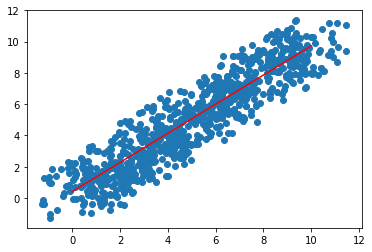

In [54]:
plt.scatter(x_train, y_train)
plt.plot(new_data,prediction, 'r')